Приложение Procrastinate Pro+ несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Изучим
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов,
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

# Шаг 1. Просмотр данных и подготовка их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
#импорт необходимых библиотек
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
#читаем файлы с вариантыми путей

visits_pth_1 = '*/visits_info_short.csv'
orders_pth_1 = '*/orders_info_short.csv'
costs_pth_1 = '*/costs_info_short.csv'

visits_pth_2 = 'D:/Y_P/BPA/visits_info_short.csv'
orders_pth_2 = 'D:/Y_P/BPA/orders_info_short.csv'
costs_pth_2 = 'D:/Y_P/BPA/costs_info_short.csv'


if os.path.exists(visits_pth_1):
    visits = pd.read_csv(visits_pth_1)
elif os.path.exists(visits_pth_2):
    visits = pd.read_csv(visits_pth_2)
else:
    print('Ошибка чтения файла "visits_info_short.csv"')

if os.path.exists(orders_pth_1):
    orders = pd.read_csv(orders_pth_1)
elif os.path.exists(orders_pth_2):
    orders = pd.read_csv(orders_pth_2)
else:
    print('Ошибка чтения файла "orders_info_short.csv"')
    
if os.path.exists(costs_pth_1):
    costs = pd.read_csv(costs_pth_1)
elif os.path.exists(costs_pth_2):
    costs = pd.read_csv(costs_pth_2)
else:
    print('Ошибка чтения файла "costs_info_short.csv"')

In [3]:
# проверка файлов visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
#изменения названий колонок
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [5]:
#меняет тип данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
#просмотр данных
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [7]:
# подсчёт пропусков в процентном выражении
visits.isna().mean()

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

In [8]:
#проверка на окончание сессчии до ее начала
for i in range(len(visits)):
    if visits['session_start'][i]>visits['session_end'][i]:
        print[i]
    if i == len(visits)-1:
        print('Ошибки не найдено')

Ошибки не найдено


In [9]:
#проверка на отрицательный id 
visits['user_id'].describe()['min']

599326.0

In [10]:
#просмотри всех регионов и поиск опечаток в их названии
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [11]:
#просмотри всех устройств и поиск опечаток в их названии
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [12]:
#просмотри всех каналов привлечени и поиск опечаток в их названии
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [13]:
# проверка файлов visits
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [14]:
#изменения названий колонок
orders.columns = orders.columns.str.lower().str.replace(' ', '_')


In [15]:
#меняет тип данных
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [16]:
#просмотр данных
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [17]:
# подсчёт пропусков в процентном выражении
visits.isna().mean()

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

In [18]:
#проверка на отрицательный id 
orders['user_id'].describe()['min']

599326.0

In [19]:
#проверка revenue
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [20]:
# проверка файлов visits
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [21]:
#изменения названий колонок
costs.columns = costs.columns.str.lower()

In [22]:
#просмотр данных
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [23]:
# подсчёт пропусков в процентном выражении
costs.isna().mean()

dt         0.0
channel    0.0
costs      0.0
dtype: float64

In [24]:
costs['channel'].value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

In [25]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

In [26]:
#меняет тип данных
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 


Данные прочитаны, пропуски отсутствуют, тип данных переведен в необходимый, можно продолжать

In [27]:
#удаление явных дубликатов
visits = visits.drop_duplicates().reset_index(drop=True)
orders = orders.drop_duplicates().reset_index(drop=True)
costs = costs.drop_duplicates().reset_index(drop=True)

# Шаг 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [28]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start'])
                        .groupby('user_id')
                        .agg({'session_start': 'first',
                              'channel': 'first',
                              'device': 'first',
                              'region': 'first',
                              })
                        .rename(columns={'session_start': 'first_ts'})
                        .reset_index()
                )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(events.query('event_name == @event')['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (profiles.groupby(['dt', 'channel'])
                         .agg({'user_id': 'nunique'})
                         .rename(columns={'user_id': 'unique_users'})
                         .reset_index()
                 )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']],
                              on=['dt', 'channel'],
                              how='left'
                             )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [29]:
# функция для расчёта удержания

def get_retention(
                profiles,
                sessions,
                observation_date,
                horizon_days,
                dimensions=[],
                ignore_horizon=False,
                ):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
                                  sessions[['user_id', 'session_start']],
                                  on='user_id',
                                  how='left'
                                  )
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims,
                                columns='lifetime',
                                values='user_id',
                                aggfunc='nunique'
                               )
        cohort_sizes = (df.groupby(dims)
                          .agg({'user_id': 'nunique'})
                          .rename(columns={'user_id': 'cohort_size'})
                       )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [30]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [31]:
# функция для расчёта LTV и ROI

def get_ltv(profiles,
            purchases,
            observation_date,
            horizon_days,
            dimensions=[],
            ignore_horizon=False,
            ):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(purchases[['user_id', 'event_dt', 'revenue']],
                                  on='user_id',
                                  how='left'
                                 )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(index=dims,
                                columns='lifetime',
                                values='revenue',
                                aggfunc='sum'
                               )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (df.groupby(dims)
                          .agg({'user_id': 'nunique'})
                          .rename(columns={'user_id': 'cohort_size'})
                          )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (cac.groupby(dims)
                  .agg({'acquisition_cost': 'mean'})
                  .rename(columns={'acquisition_cost': 'cac'})
              )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(result_raw,
                                                      dimensions,
                                                      horizon_days
                                                     )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
            result_raw,  # сырые данные
            result_grouped,  # таблица LTV
            result_in_time,  # таблица динамики LTV
            roi_grouped,  # таблица ROI
            roi_in_time,  # таблица динамики ROI
           )

In [32]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [33]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [34]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [35]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Все необходимые функции добавлины

# Шаг 3. Исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [36]:
#профили пользователей
profiles = get_profiles(visits, orders, orders['event_dt'], costs)
print(profiles['first_ts'].min())
print(profiles['first_ts'].max())


2019-05-01 00:00:41
2019-10-27 23:59:04


Первая и последняя дата соответствуют описанию

In [37]:
observation_date = datetime(2019, 10, 28).date()
horizon_days = 179

In [38]:
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [39]:
#функция создания таблицы платящих пользователей по устовию
def payer_if(name):
    
    display(profiles[name].unique())
    payer = profiles.groupby(name).sum()['payer'].reset_index()
    users = profiles.groupby('region').count()['payer'].reset_index()
    
    payer['percent_payers'] = payer['payer']/payer['payer'].sum()
    payer['percent_payers'] = round(payer['percent_payers'], 2)
   
    if name == 'channel':
        payer.loc[payer['channel'] == 'MediaTornado', 'percent_payers'] =  0.01 #питон почему то считает не 1 а 1.000000001, изза чего не работает, еслия я что то длаю не ток, обьясните пожалуйста
        
        payer = payer.sort_values('percent_payers', ascending=False)
        payer = payer.reset_index()
        
        tempo_per = 0 
        for i in range(len(payer)):
            if i > 4:
                tempo_per += payer['percent_payers'][i]                
        payer = payer.sort_values('payer', ascending=False)
        tempo_pay = 0 
        for i in range(len(payer)):
            if i > 4:
                tempo_pay += payer['payer'][i]
        new_row = ({'channel' : 'other',
                   'payer':tempo_pay,
                   'percent_payers':tempo_per})
        payer = payer.drop(columns=['index'])
        payer = payer.append(new_row, ignore_index=True) 
        payer = payer.sort_values('payer', ascending=False).head(6)
    display("Процент от общего кол-ва платящих пользователей")    
    display(payer)    
    vals = payer.sort_values('payer', ascending=False)['percent_payers']
    labels = payer.sort_values('payer', ascending=False)[name]
    fig, ax = plt.subplots()
    ax.pie(vals, labels=labels,normalize=False, autopct='%.0f%%')
    ax.axis("equal")
    if name == 'region':
        plt.title('Процент платящих пользователей по регимону')
    elif name == 'device':
        plt.title('Процент платящих пользователей по устройству')
    elif name == 'channel':
        plt.title('Процент платящих пользователей по рекламному каналу')
    payer = profiles.groupby(name).sum()['payer'].reset_index()
    users = profiles.groupby(name).count()['user_id'].reset_index()
    payer = payer.merge(users, on = name, how = 'left')
    payer = payer.rename(columns={'user_id':'user'})
    payer['percent_payer'] = payer['payer']/payer['user']*100    
    display('Процент платящих пользователй от общего кол-ва в регионе')
    display(payer)
    payer = payer.drop(columns=['payer','user'])
    payer = payer.sort_values('percent_payer', ascending=False)
    payer.plot(x=name, y="percent_payer", kind="bar",grid=True)
    if name == 'region':
        plt.title('Процент платящих пользователей от всех пользоватлей по региону')
    elif name == 'device':
        plt.title('Процент платящих пользователей от всех пользоватлей по устройству')
    elif name == 'channel':
        plt.title('Процент платящих пользователей от всех пользоватлей по рекламному каналу')

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

'Процент от общего кол-ва платящих пользователей'

,region,payer,percent_payers
0,France,663,0.07
1,Germany,616,0.07
2,UK,700,0.08
3,United States,6902,0.78


'Процент платящих пользователй от общего кол-ва в регионе'

,region,payer,user,percent_payer
0,France,663,17450,3.799427
1,Germany,616,14981,4.111875
2,UK,700,17575,3.982930
3,United States,6902,100002,6.901862


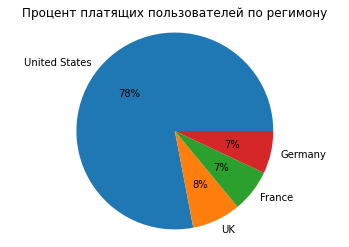

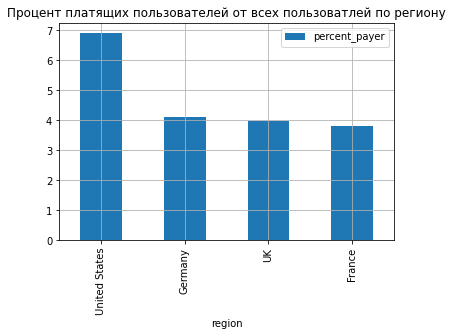

In [40]:
payer_if('region')

Весь поток приходятся на США, Францию, Германию и Англию

Из США приходить практически 7 тысяч покупателей, это почти 78% всех платящих пользоватлей

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

'Процент от общего кол-ва платящих пользователей'

,device,payer,percent_payers
0,Android,2050,0.23
1,Mac,1912,0.22
2,PC,1537,0.17
3,iPhone,3382,0.38


'Процент платящих пользователй от общего кол-ва в регионе'

,device,payer,user,percent_payer
0,Android,2050,35032,5.851793
1,Mac,1912,30042,6.364423
2,PC,1537,30455,5.046790
3,iPhone,3382,54479,6.207897


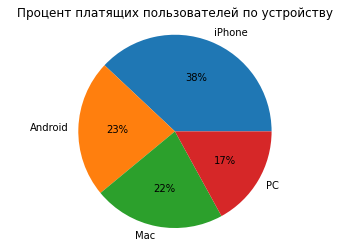

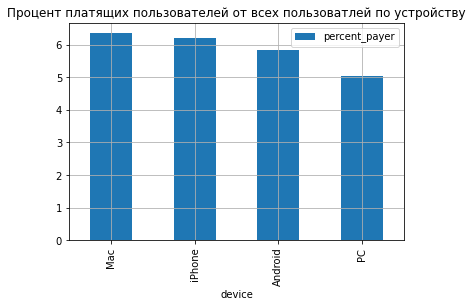

In [41]:
payer_if('device')

По устройствам картина примерно одинакова, но платящие пользователи предпочитают мобильные устройства(61% против 39), все пользователи приносят 5-6,4

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

C:\Users\Glapa\AppData\Local\Temp\ipykernel_6000\522631191.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  payer = payer.append(new_row, ignore_index=True)


'Процент от общего кол-ва платящих пользователей'

,channel,payer,percent_payers
0,FaceBoom,3557,0.40
1,TipTop,1878,0.21
11,other,1393,0.16
2,organic,1160,0.13
3,WahooNetBanner,453,0.05
4,AdNonSense,440,0.05


'Процент платящих пользователй от общего кол-ва в регионе'

,channel,payer,user,percent_payer
0,AdNonSense,440,3880,11.340206
1,FaceBoom,3557,29144,12.204914
2,LeapBob,262,8553,3.063253
3,MediaTornado,156,4364,3.574702
4,OppleCreativeMedia,233,8605,2.707728
5,RocketSuperAds,352,4448,7.913669
6,TipTop,1878,19561,9.600736
7,WahooNetBanner,453,8553,5.296387
8,YRabbit,165,4312,3.826531
9,lambdaMediaAds,225,2149,10.469986


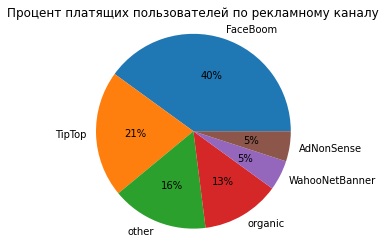

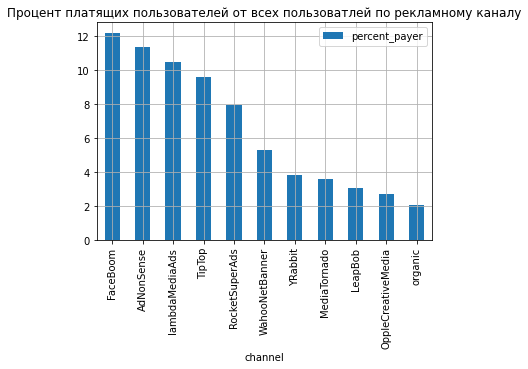

In [42]:
payer_if('channel')

Больше всего платящих пользователей привлекают каналы FaceBoom и TipTop,40% и 21% соответственно, далее 13% "органических" пользователей, по 5% у AdNonSense и WahooNetBanner, и 16% у остальных 6ти каналов YRabbit, MediaTornado, RocketSuperAds, LeapBob, OppleCreativeMedia, lambdaMediaAds

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [43]:
cost = costs.pivot_table(columns='channel', aggfunc='sum')
cost = cost.T.reset_index()
cost['percent_sales'] = cost['costs']/cost['costs'].sum()
result = sum(cost['costs'])
print('Всего потрачено на рекламу:',int(result))
cost

Всего потрачено на рекламу: 105497


,channel,costs,percent_sales
0,AdNonSense,3911.25,0.037074
1,FaceBoom,32445.60,0.307549
2,LeapBob,1797.60,0.017039
3,MediaTornado,954.48,0.009047
4,OppleCreativeMedia,2151.25,0.020392
5,RocketSuperAds,1833.00,0.017375
6,TipTop,54751.30,0.518983
7,WahooNetBanner,5151.00,0.048826
8,YRabbit,944.22,0.008950
9,lambdaMediaAds,1557.60,0.014764


Text(0.5, 1.0, 'Процент рекламных источников по месяцам ')

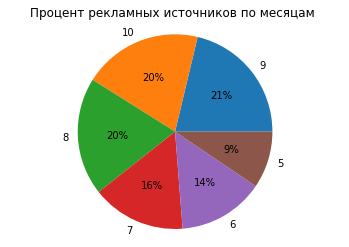

In [44]:
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month

cost_m = costs.pivot_table(columns='dt_month', aggfunc='sum')
cost_m = cost_m.T.reset_index()
cost_m['percent_sales'] = cost_m['costs']/cost_m['costs'].sum()

vals = cost_m.sort_values('costs', ascending=False)['percent_sales']
labels = cost_m.sort_values('costs', ascending=False)['dt_month']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels,normalize=False, autopct='%.0f%%')
ax.axis("equal")
plt.title('Процент рекламных источников по месяцам ')

Колличество стредств на рекламу в мае было в двое меньше чем в последнии месяцы

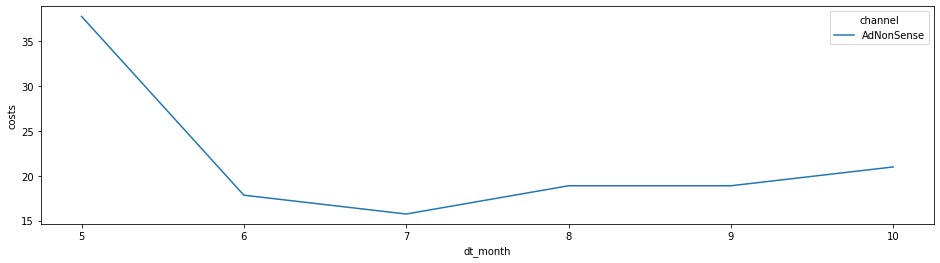

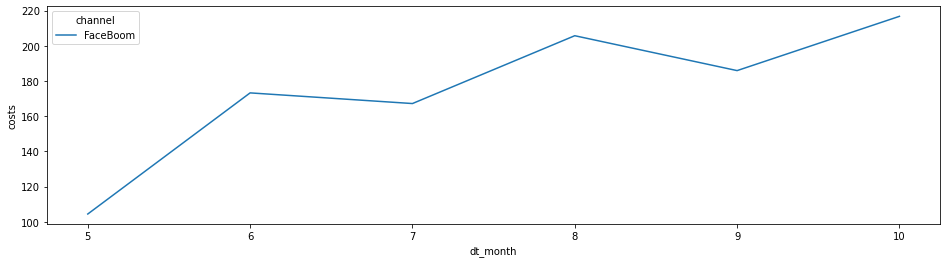

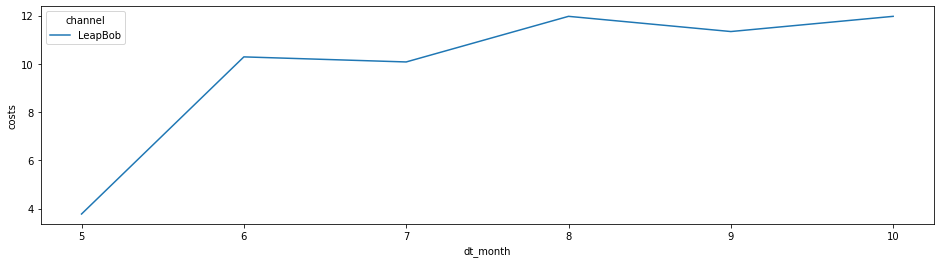

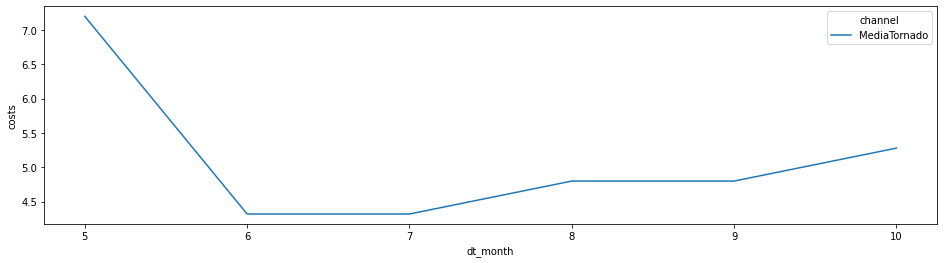

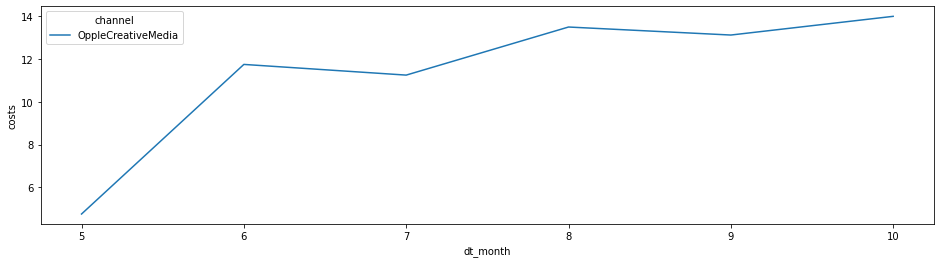

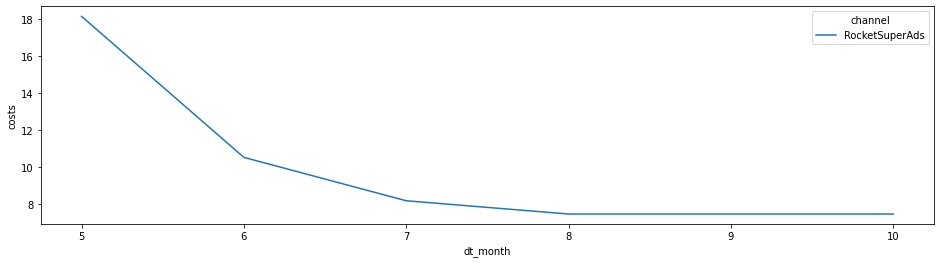

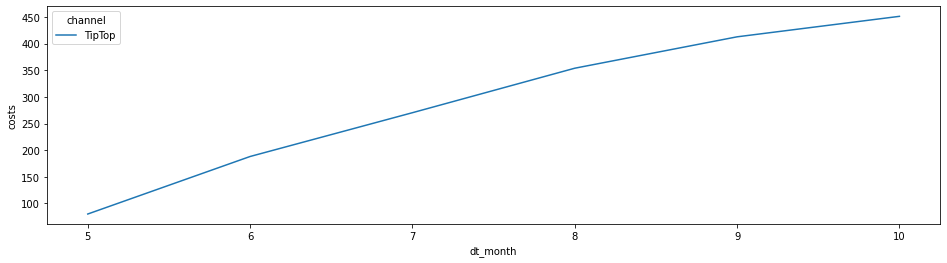

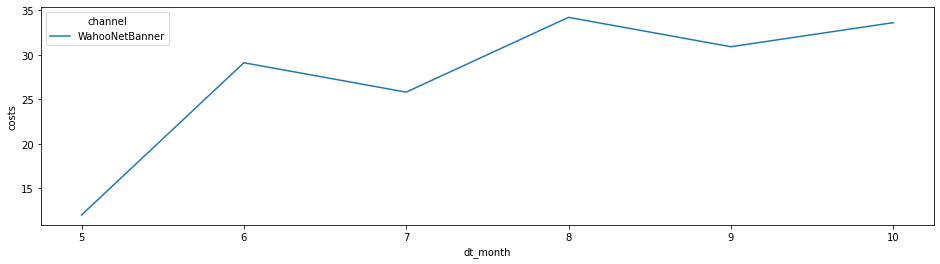

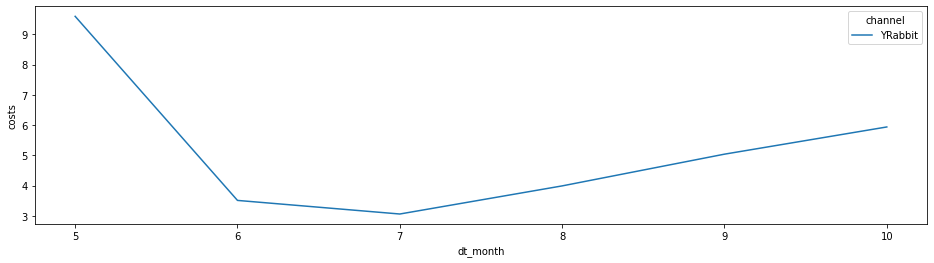

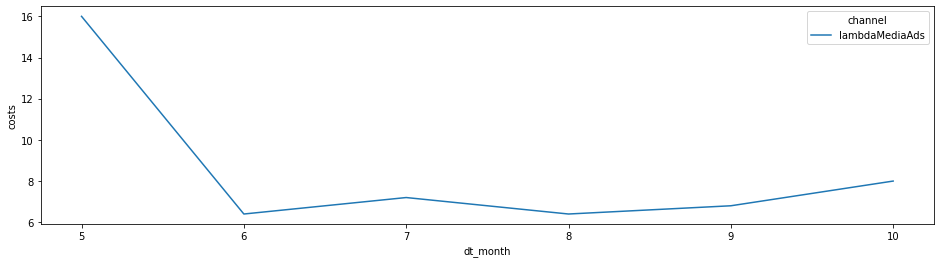

In [45]:
#создание датафрейма дата(месяц, канал)
data = costs.groupby(['channel', 'dt_month']).median().reset_index()
#функция вызова графика
def channels(name):   
    plt.figure(figsize=(16,4))
    sns.lineplot(data=data[data['channel']==name], x='dt_month', y='costs', hue='channel');
#вызов графиков 
for elem in data['channel'].unique():
    channels(elem) 

<AxesSubplot:xlabel='dt_month'>

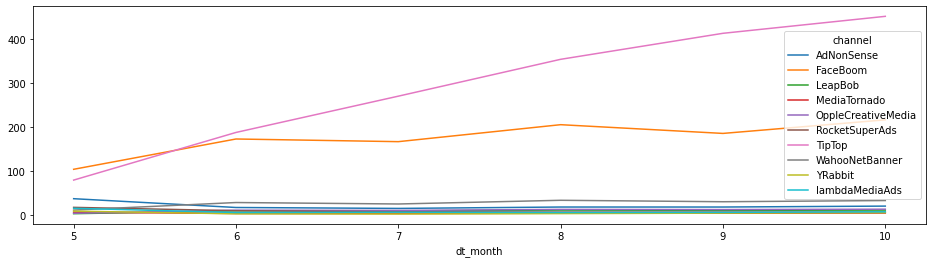

In [46]:
data = costs
data = data.pivot_table(index='dt_month',columns ='channel' ,values='costs',aggfunc='median')
data = data.reset_index()
data.plot(y=['AdNonSense','FaceBoom','LeapBob','MediaTornado','OppleCreativeMedia','RocketSuperAds',
             'TipTop','WahooNetBanner','YRabbit','lambdaMediaAds'],
          x='dt_month',
          figsize=(16,4))


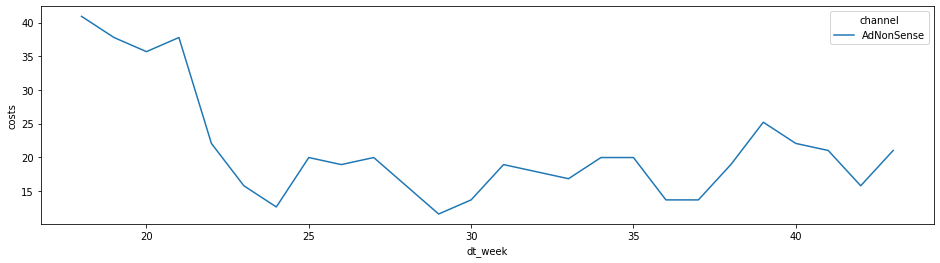

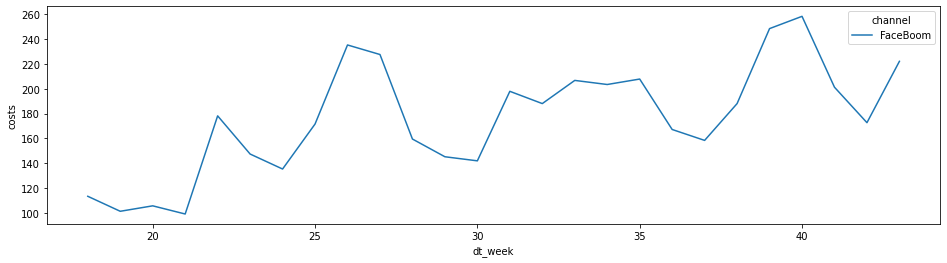

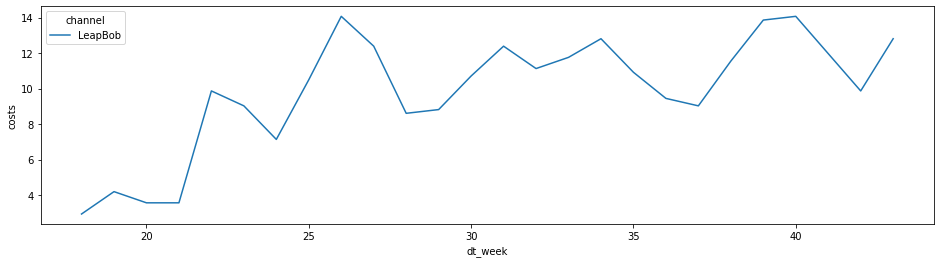

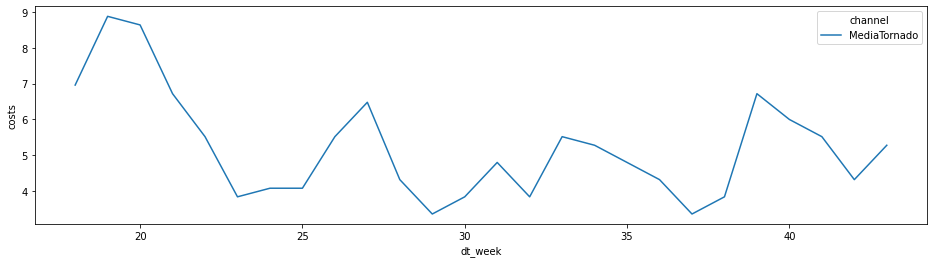

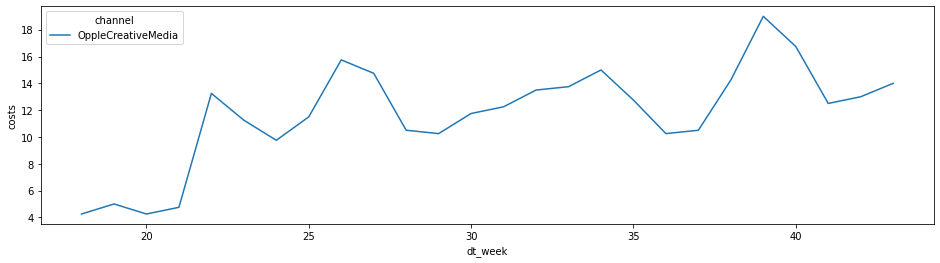

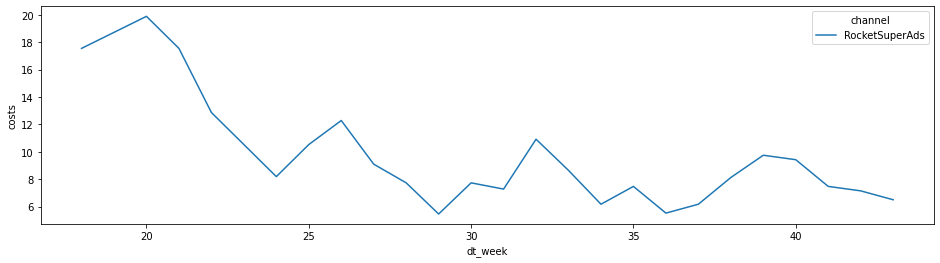

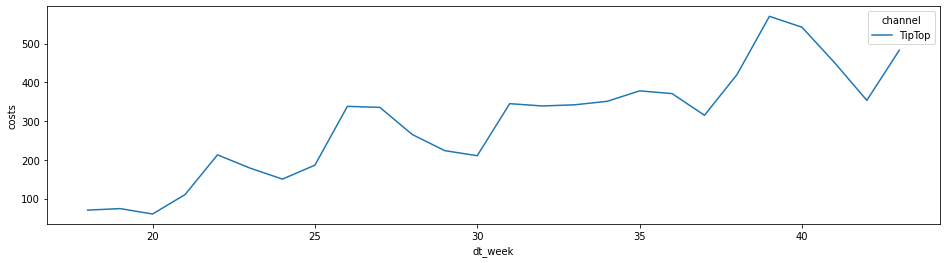

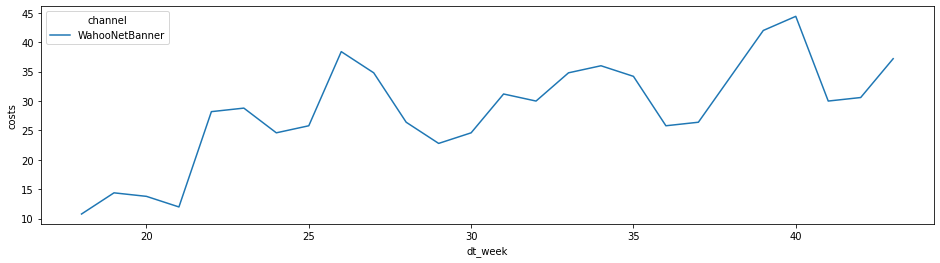

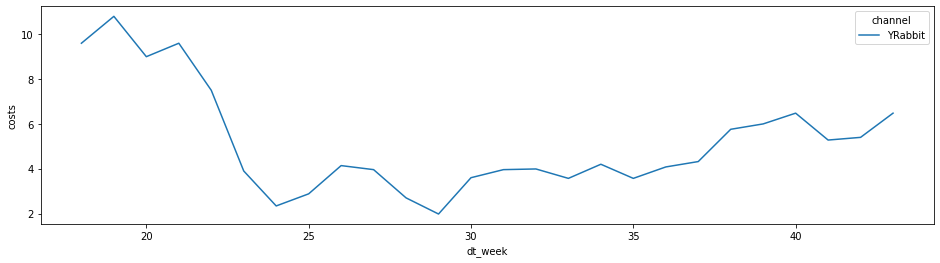

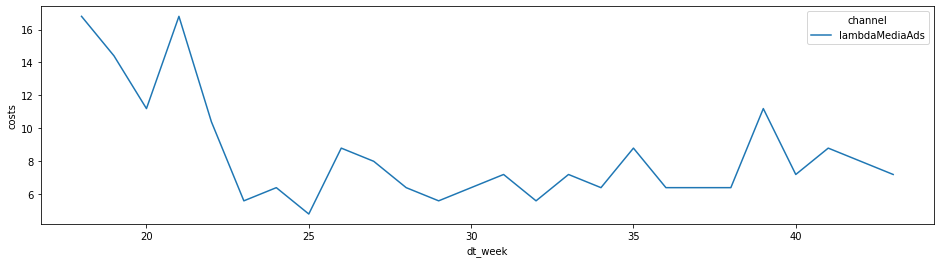

In [47]:
data = costs
data['dt_week'] = pd.to_datetime(data['dt']).dt.isocalendar().week
#создание датафрейма дата(месяц, канал)
data = costs.groupby(['channel', 'dt_week']).median().reset_index()
#функция вызова графика
def channels(name):   
    plt.figure(figsize=(16,4))
    sns.lineplot(data=data[data['channel']==name], x='dt_week', y='costs', hue='channel');
#вызов графиков 
for elem in data['channel'].unique():
    channels(elem) 

<AxesSubplot:xlabel='dt_week'>

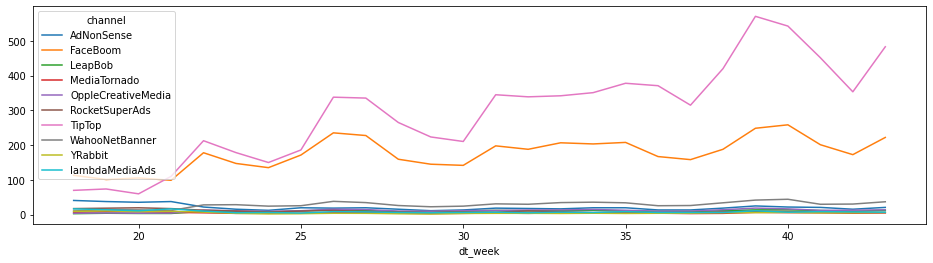

In [48]:
data = costs
data['dt_week'] = pd.to_datetime(data['dt']).dt.isocalendar().week
data = data.pivot_table(index='dt_week',columns ='channel' ,values='costs',aggfunc='median')
data = data.reset_index()
data.plot(y=['AdNonSense','FaceBoom','LeapBob','MediaTornado','OppleCreativeMedia','RocketSuperAds',
             'TipTop','WahooNetBanner','YRabbit','lambdaMediaAds'],
          x='dt_week',
          figsize=(16,4))

FaceBoom и Tip Top явно лидируют в списке затрат на рекламу, причем первый канал требует в два споловиной больше средств чем второй

In [49]:
#средний САС для каждого канала
channel_mean_cac = (profiles.loc[:, ['channel','acquisition_cost']]
                            .groupby('channel')
                            .mean()
                            .rename(columns={'acquisition_cost':'mean_cac'})
                            .sort_values('mean_cac',ascending=False))
channel_mean_cac

,mean_cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


# Шаг 5. Окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

In [50]:
#исключаем пользователей с органическим трафиком
profiles = profiles.query('channel != "organic"')
#проверка
profiles['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

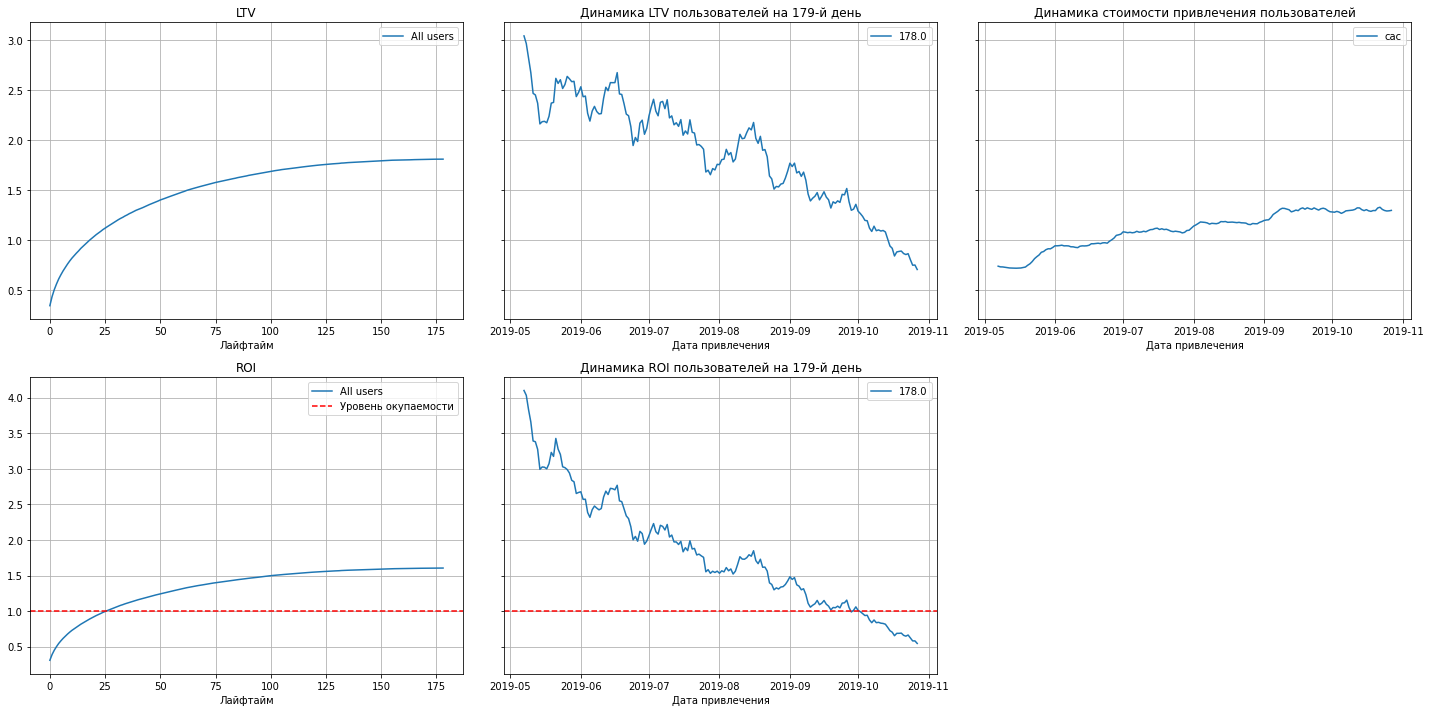

In [51]:
# считаем LTV и ROI
(ltv_raw,
 ltv_grouped,
 ltv_history,
 roi_grouped,
 roi_history) = get_ltv(profiles,
                        orders,
                        datetime(2019, 10, 28).date(),
                        horizon_days,#
                        ignore_horizon=True
                       )
# строим графики 
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 179
            ) 

В общем за пол года реклама окупается немного больше чем в 2 раза, но динамика с самого начала падала, а последний месяц реклама перестала окупаться


* CAC растет, но последние 2 месяца держится на одном уровне
* Динамика LTV падет.

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

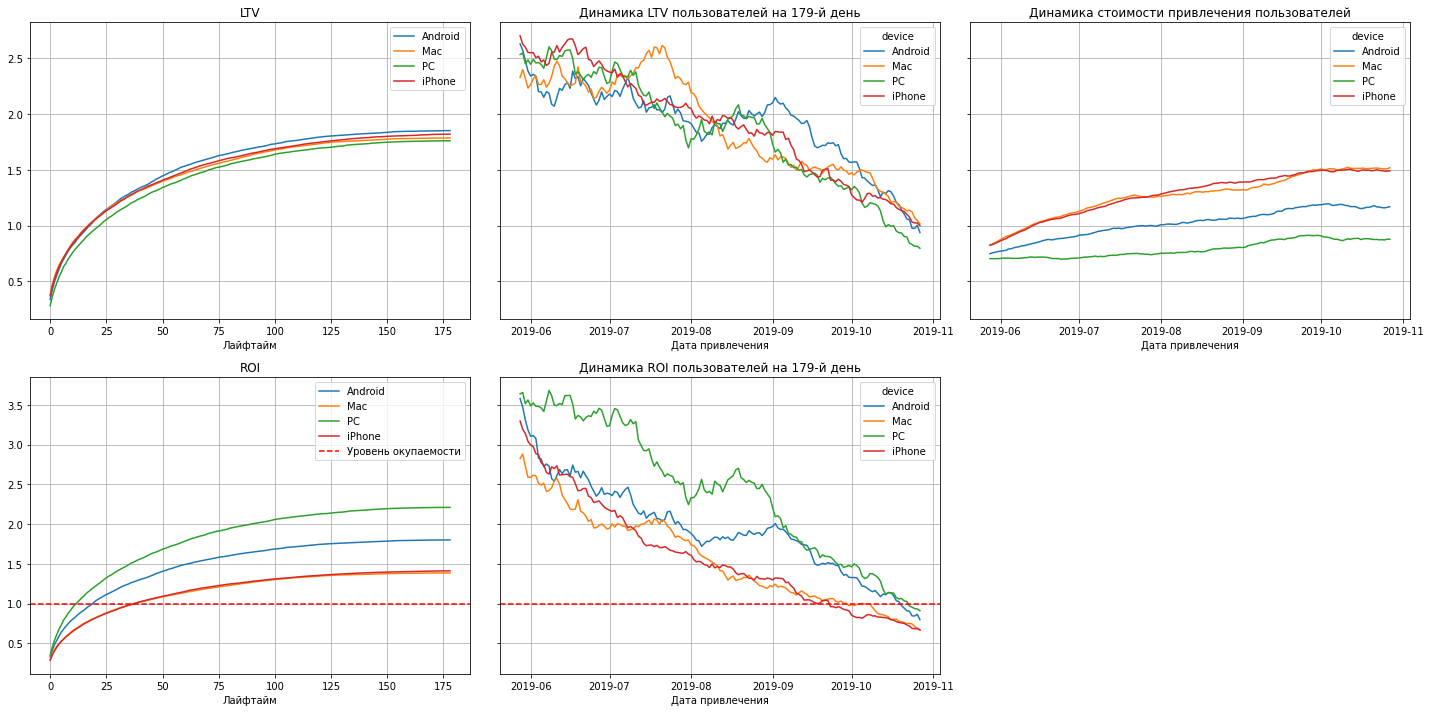

In [52]:
# считаем LTV и ROI устройству

(ltv_raw,
 ltv_grouped,
 ltv_history,
 roi_grouped,
 roi_history) = get_ltv(profiles,
                        orders,
                        observation_date,
                        179,#
                        ignore_horizon=True,
                        dimensions=['device']
                       )
# строим графики 
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 179, window = 28) #увеличил окно, чтобы уменьшить шум

За все время реклама окупается, но рекламные каналы  lambdaMediaAds и FaceBoom нет, а на последнюю уходит почти треть всех рекламных затрат.
У Tip Top почти каждый месяц растет цена стоимость привлечения пользователей, но все они окупаиль кроме последних 5-6 недель.
Пользователи из США обходятся дороже пользователей их других стран, и "цена" на них продолжает расти.
Соимость привелчения для обладателей техники Aplle растет больше чем для других покупателей, и ROI  у них самый низкий, но последний месяц ROI для всех пользователей ниже уровня окупаемости.
Я бы порекомендовал
* улучшить сервис для iPhone и Mac
* пересмотреть отношения с TipTop и  FaceBoom как рекламный канал
* выяснить причины спада окупаемости клиентов из США


Картина без сильных изменений, от общей, значит дело не в устройстве которым пользуются пользователи, однако хуже всего дела с iPhone и Мас, динамика стоимости привлечения растет больше остальных, ROI хуже всех

### Проанализируйте окупаемость рекламы с разбивкой по странам

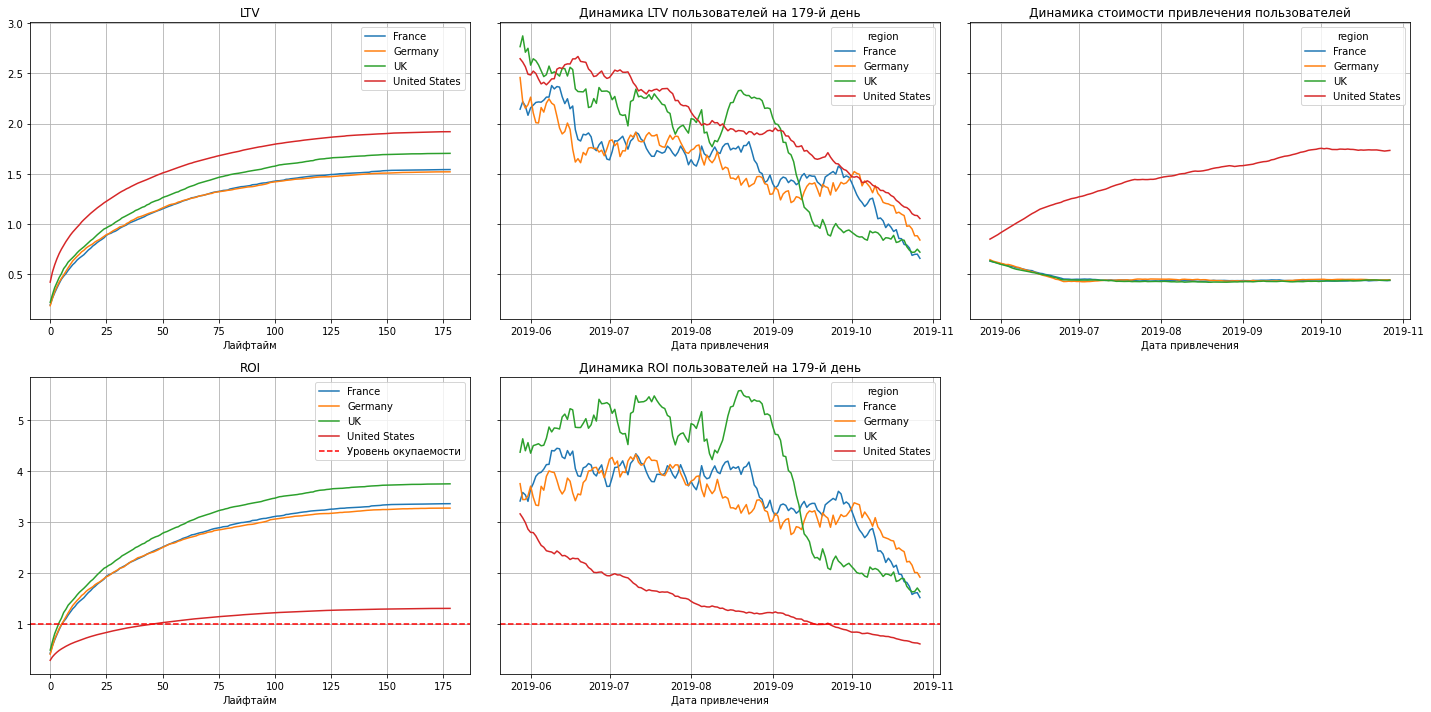

In [53]:
# считаем LTV и ROI по страннам
(ltv_raw,
 ltv_grouped,
 ltv_history,
 roi_grouped,
 roi_history) = get_ltv(profiles,
                        orders,
                        observation_date,
                        horizon_days,#
                        ignore_horizon=True,
                        dimensions=['region']
                       )
# строим графики 
plot_ltv_roi(ltv_grouped,ltv_history, roi_grouped, roi_history, 179, window = 28) #увеличил окно, чтобы уменьшить шум

По графикам можно сделать такие выводы:
* В целом реклама окупается, но для США показатели сильно ниже чем для других стран, в динамике дела еще хуже.
* CAC стабилен, но не для США. Рекламный бюджета в штатах более чем в 3 раза выше чем в других странах.
* Динамика LTV падет
* Динамика ROI для всех стран начала значительно снижаться в начале сентября, но не для США, там динакмика падала все время.


### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

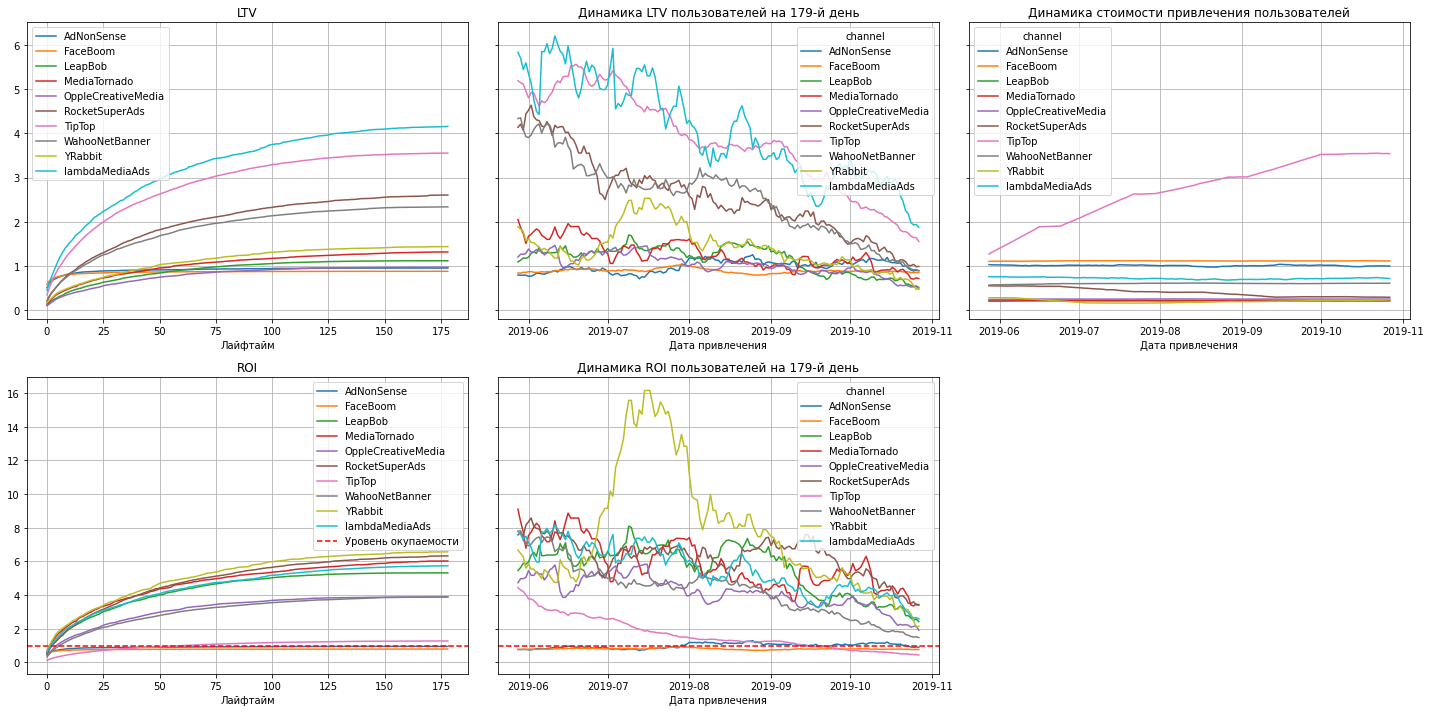

In [54]:
# считаем LTV и ROI по рекламным каналам
(ltv_raw,
 ltv_grouped,
 ltv_history,
 roi_grouped,
 roi_history) = get_ltv(profiles,
                        orders,
                        observation_date,
                        horizon_days,#
                        ignore_horizon=True,
                        dimensions=['channel']
                       )
# строим графики 
plot_ltv_roi(ltv_grouped,
             ltv_history,
             roi_grouped,
             roi_history,
             179, window = 28) #увеличим окно чтобы уменьшить шум


Не все рекламные каналы могут похвастаться окупаемостью, например AdNonSense и FaceBoom не окупались почти никогда, стоимость привлечения пользователей растет только у "Tip Top", и последние несколько месяцев этот канал тоже перестал окупаться

C:\Users\Glapa\AppData\Local\Temp\ipykernel_6000\2579624720.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cost = cost.append(new_row, ignore_index=True)


Text(0.5, 1.0, 'Процент затрат на рекламные источники')

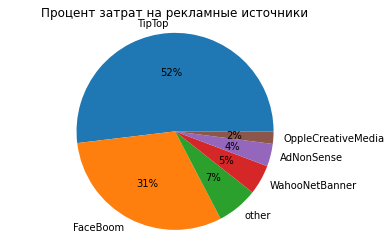

In [55]:
cost = costs.pivot_table(columns='channel', aggfunc='sum')
cost = cost.T.reset_index()
cost['percent_sales'] = cost['costs']/cost['costs'].sum()
cost = cost.sort_values('costs', ascending=False)
cost = cost.reset_index()
tempo_cos = 0 
for i in range(len(cost)):
    if i > 4:
        tempo_cos += cost['costs'][i]
cost = cost.sort_values('percent_sales', ascending=False)
tempo_per = 0 
for i in range(len(cost)):
    if i > 4:
        tempo_per += cost['percent_sales'][i]
new_row = ({'channel' : 'other',
            'costs':tempo_cos,
            'percent_sales':tempo_per})
cost = cost.drop(columns=['index','dt_month'])
cost = cost.append(new_row, ignore_index=True)
cost = cost.sort_values('costs', ascending=False).head(6)
vals = cost.sort_values('costs', ascending=False)['percent_sales']
labels = cost.sort_values('costs', ascending=False)['channel']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels,normalize=False, autopct='%.0f%%')
ax.axis("equal")
plt.title('Процент затрат на рекламные источники')

На FaceBoom уходит 31% всех рекламных средств, а окупаемости у него нет, Tip Top же занимает больше половины, 52%, этот канал рекламы окупается почти в 4 раза

In [56]:
channel_mean_cac.sort_values('mean_cac', ascending=False)

,mean_cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Стоимость одного пользователя из канла Tip Top практически в 2,5 раза больше, у "топ 2" FaceBoom в списке рекламных кналов, и оба рекламных канала не окупаются в последнее время

За все время реклама окупается, но рекламные каналы  lambdaMediaAds и FaceBoom нет, а на последнюю уходит почти треть всех рекламных затрат.
У Tip Top почти каждый месяц растет цена стоимость привлечения пользователей, но все они окупаиль кроме последних 5-6 недель.
Пользователи из США обходятся дороже пользователей их других стран, и "цена" на них продолжает расти.
Соимость привелчения для обладателей техники Aplle растет больше чем для других покупателей, и ROI  у них самый низкий, но последний месяц ROI для всех пользователей ниже уровня окупаемости.
Я бы порекомендовал
* улучшить сервис для iPhone и Mac
* пересмотреть отношения с TipTop и  FaceBoom как рекламный канал
* выяснить причины спада окупаемости клиентов из США


In [57]:
observation_date = datetime(2019, 10, 1).date()
horizon_days = 14

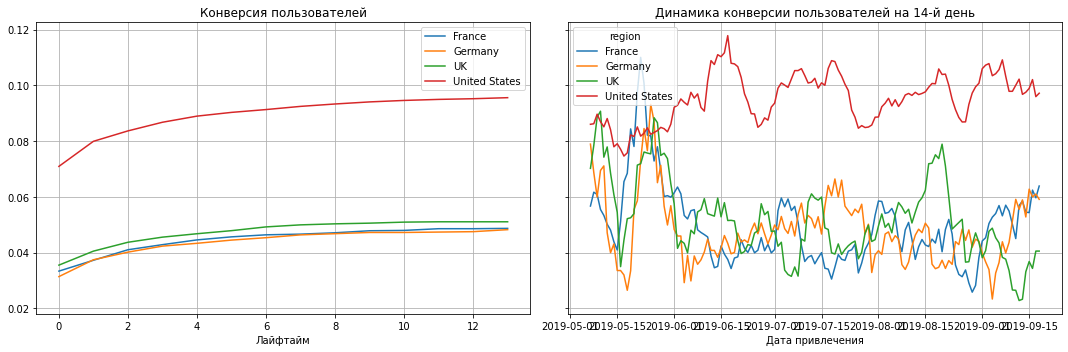

In [58]:
dimensions = ['region']
(conversion_raw,
 conversion_grouped,
 conversion_history) = get_conversion(profiles,
                                      orders,
                                      observation_date,
                                      horizon_days,
                                      dimensions=dimensions,
                                     )

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

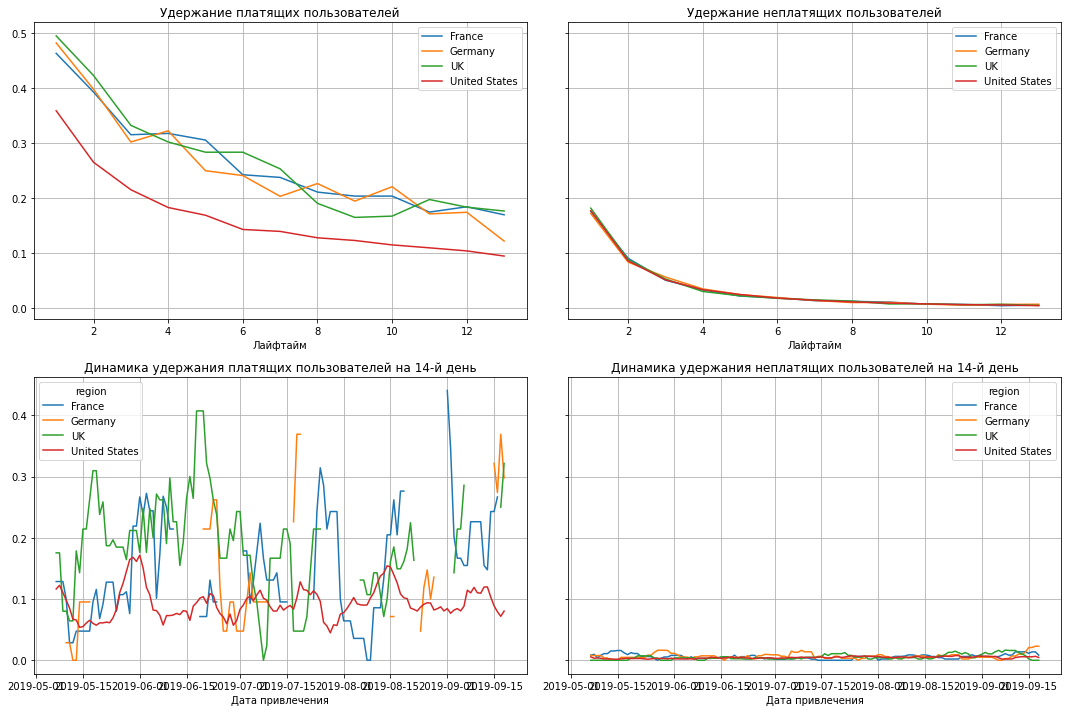

In [59]:
(retention_raw,
 retention_grouped,
 retention_history) = get_retention(profiles,
                                      visits,
                                      observation_date,
                                      horizon_days,
                                      dimensions=dimensions
                                     )

plot_retention(retention_grouped, retention_history, horizon_days) 


Судя по графикам пользователи из США конвертируются очень хорошо, но удержание у них жуже всех

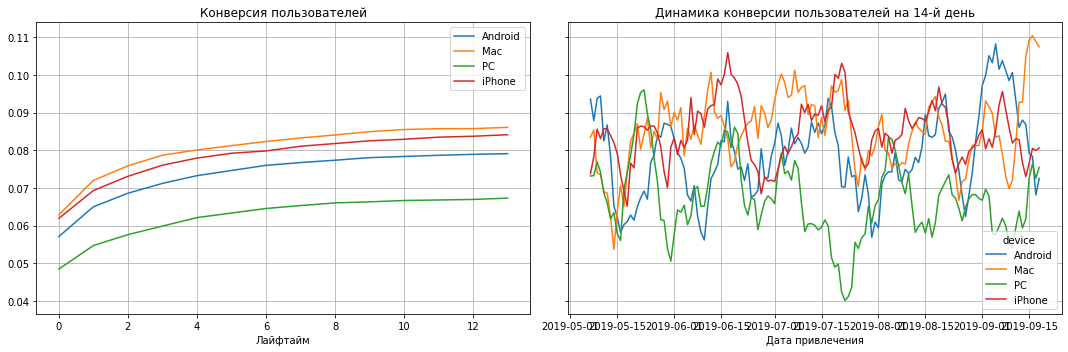

In [60]:
dimensions = ['device']
(conversion_raw,
 conversion_grouped,
 conversion_history) = get_conversion(profiles,
                                      orders,
                                      observation_date,
                                      horizon_days,
                                      dimensions=dimensions,
                                     )

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

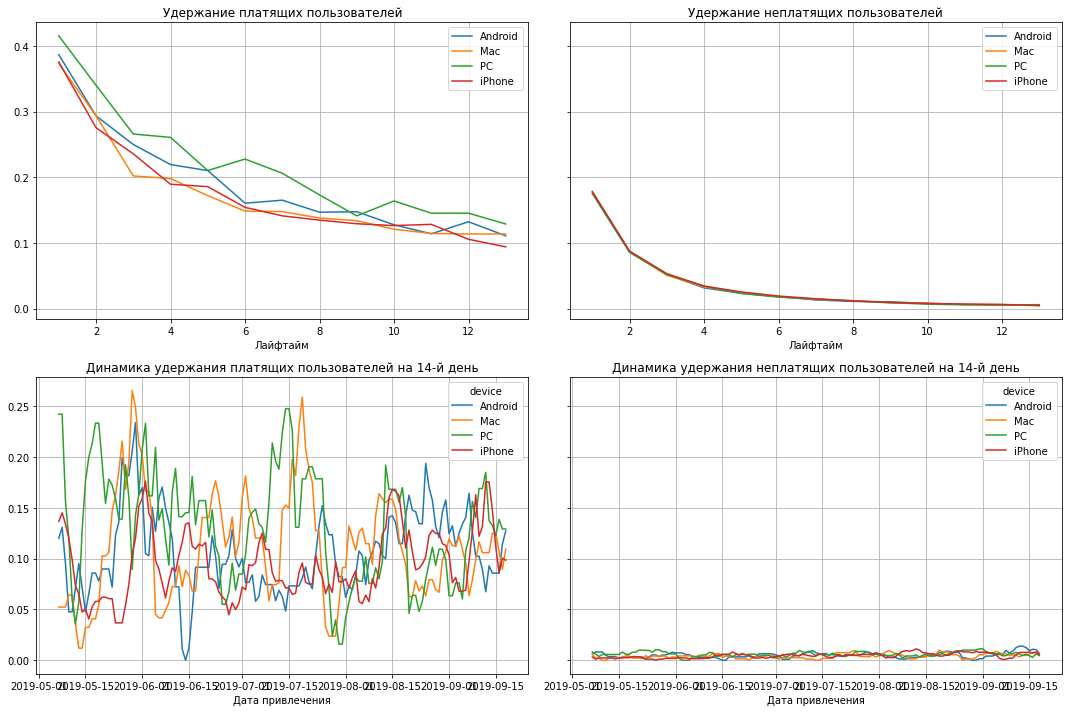

In [61]:
(retention_raw,
 retention_grouped,
 retention_history) = get_retention(profiles,
                                      visits,
                                      observation_date,
                                      horizon_days,
                                      dimensions=dimensions
                                     )

plot_retention(retention_grouped, retention_history, horizon_days) 


На графиках видно, что пользователи ПК имеют не самую лучшеую конверсию но за-то они самые удерживаемые

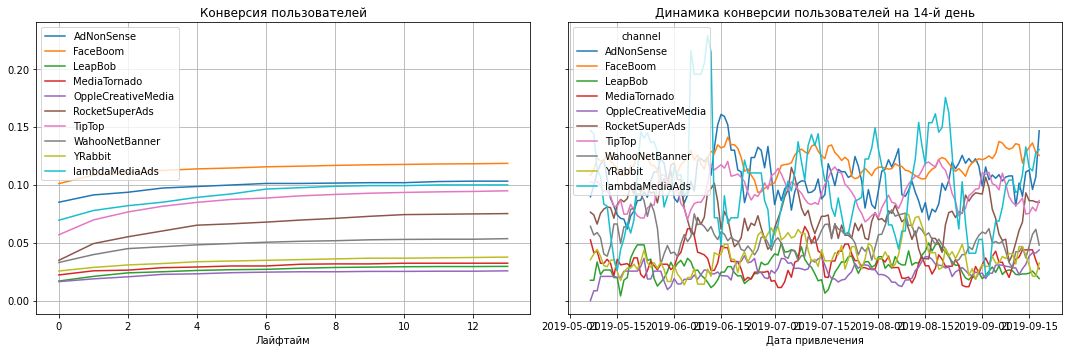

In [62]:
dimensions = ['channel']
(conversion_raw,
 conversion_grouped,
 conversion_history) = get_conversion(profiles,
                                      orders,
                                      observation_date,
                                      horizon_days,
                                      dimensions=dimensions,
                                     )

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

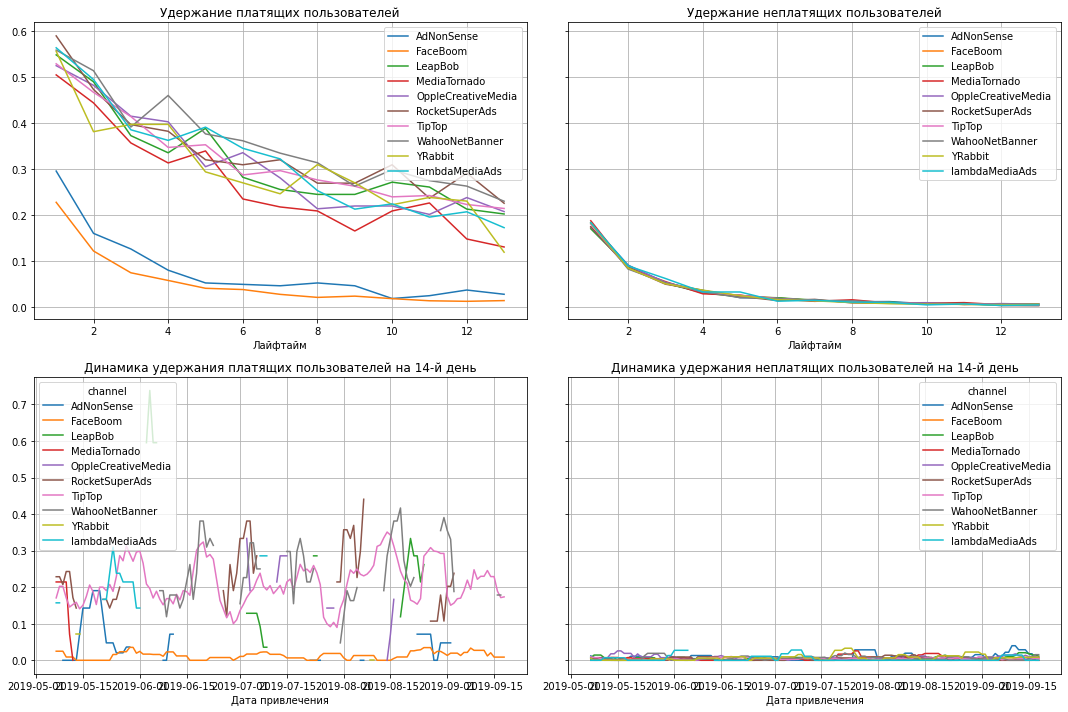

In [63]:
(retention_raw,
 retention_grouped,
 retention_history) = get_retention(profiles,
                                      visits,
                                      observation_date,
                                      horizon_days,
                                      dimensions=dimensions
                                     )

plot_retention(retention_grouped, retention_history, horizon_days) 

Среди каналов привлечения самые низкие показатели удержания у AdNonSense и FaceBoom, хотя конверсия у них на высокоми уровне

# Шаг 6. Вывод

- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

В целом реклама за все время окупилась в 2 раза, но стоимость привлечения новых клентов растет, а динамика их LTV и ROI все хуже и хуже

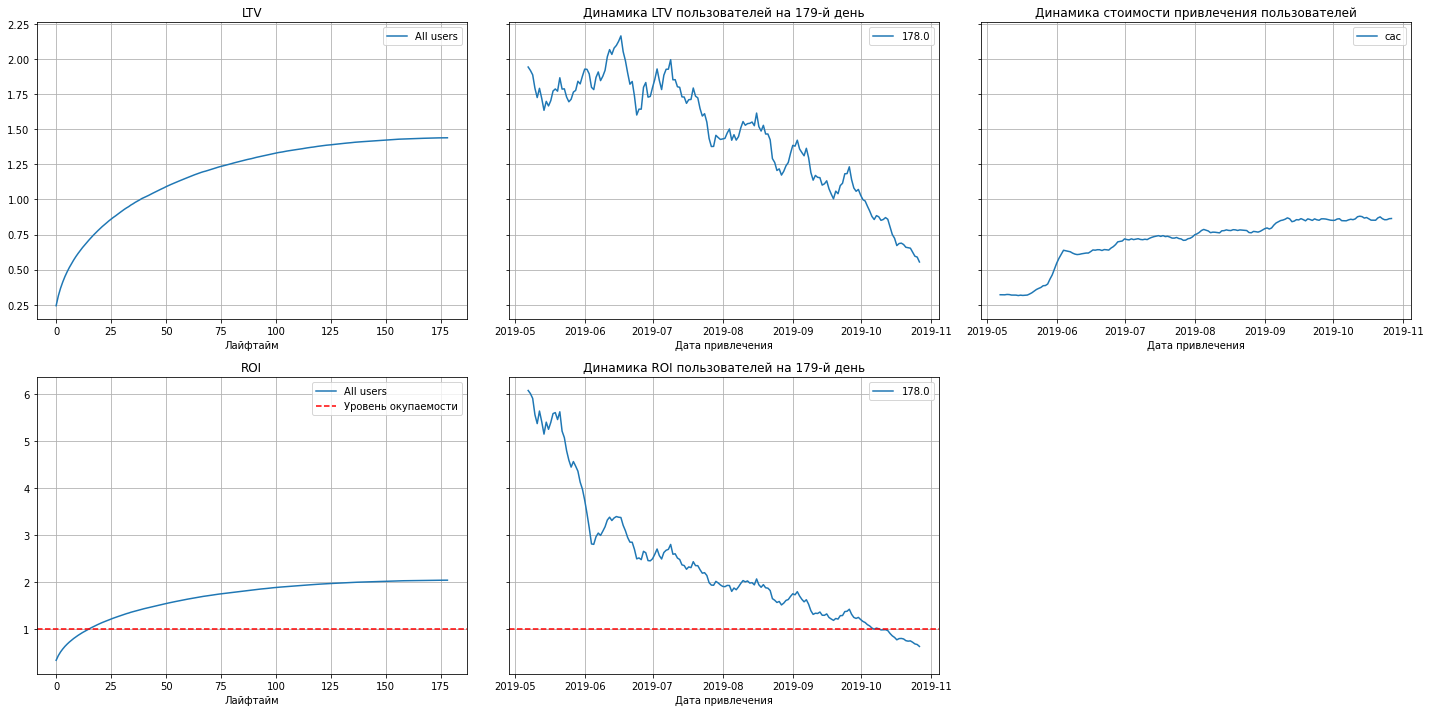

Первое что хотелось бы заметить это неэфективность влажений в канал привелчения FaceBoom(31% от общих трат на рекламу),удержание платящих  пользователей у него хуже остальных, на ровне с AdNonSense (4% от общих трат на рекламу), к тому же канал FaceBoom не окупается, а при этом на него уходит почти треть всех трат на рекламу, рекомендую пересмотреть отношение с этим каналом прривлеченя, а так же с каналами lambdaMediaAds(1.5% от общих трат на рекламу) из-за неокупаемости и AdNonSense из-за низких показателей удержания платящих пользователей

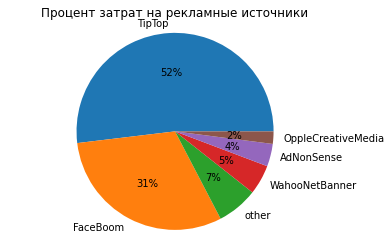

Второе платящие пользователи из США конвертируются очень хорошо, но удержание у них жуже всех, а они составляют 78% всех платящих пользователей

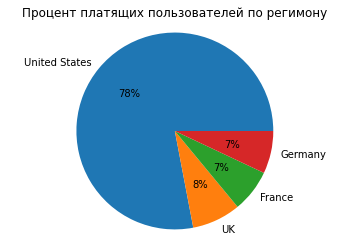

Насчет утсройств с которых заходят пользователи можно сказать только-то что мобильная версия более прибыльна, чем десктопная, но лучшая конверсия за Мас, а самое высокое удержанае забрали пользователи с ПК

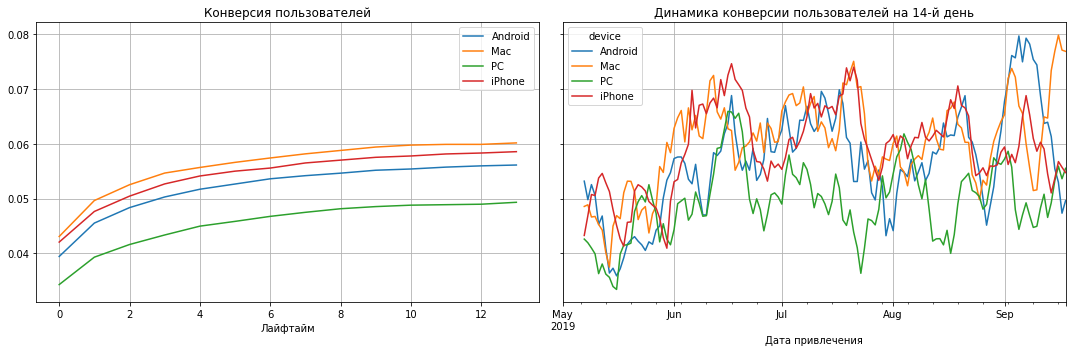

Хотелось бы обратить внимание на каналы YRabbit,RocketSuperAds,lambdaMediaAds
LTV и ROI этих каналов на хорошем уровне, стоимость привлечения пользователей держится на одном уровнеу 

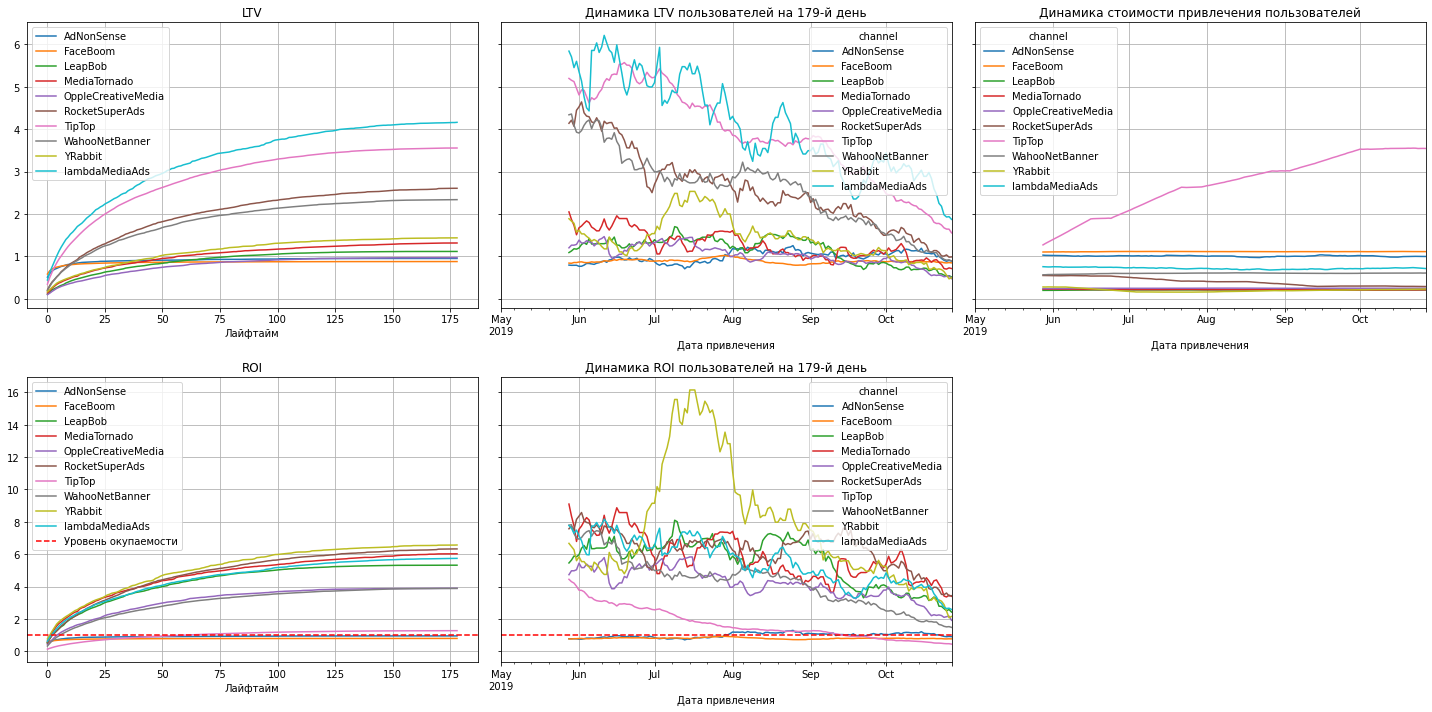

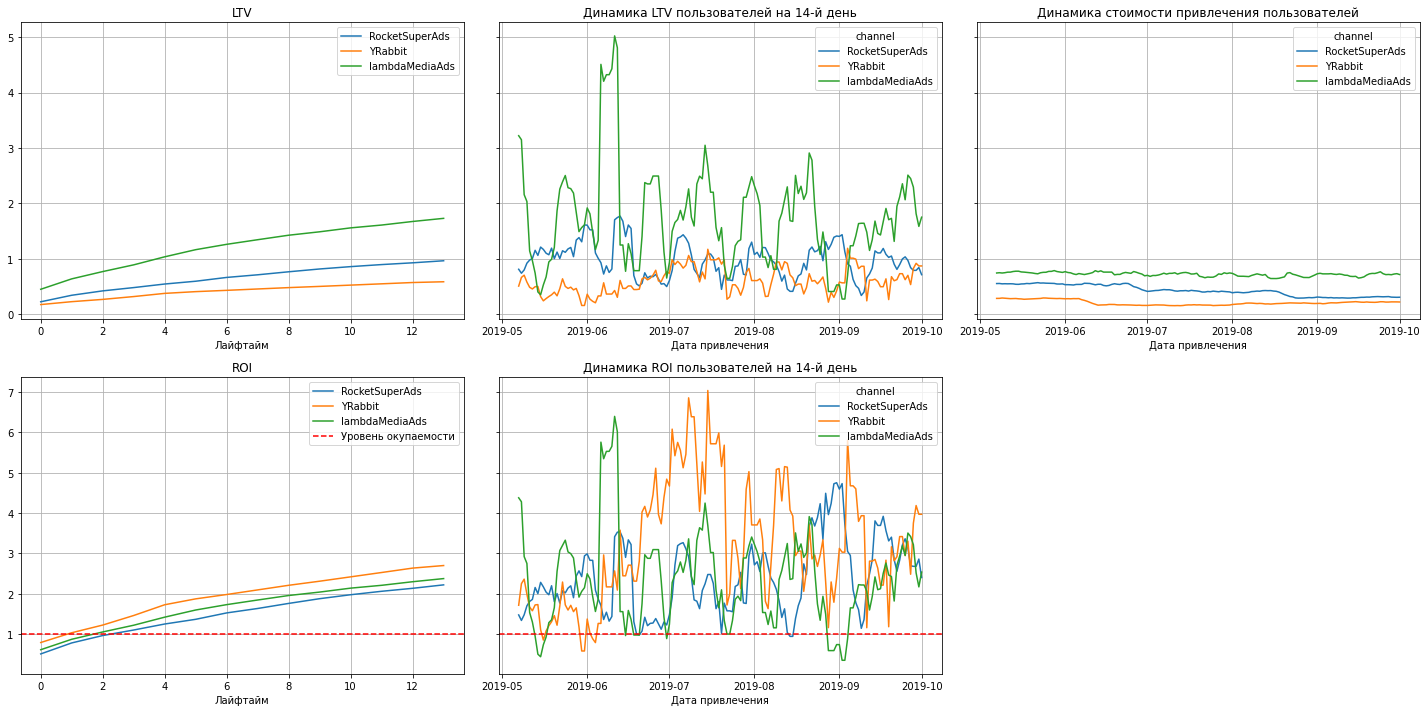

In [64]:
profiles_c = profiles.query('channel != "FaceBoom"')
profiles_c = profiles_c.query('channel != "AdNonSense"')
profiles_c = profiles_c.query('channel != "MediaTornado"')
profiles_c = profiles_c.query('channel != "LeapBob"')
profiles_c = profiles_c.query('channel != "TipTop"')
profiles_c = profiles_c.query('channel != "WahooNetBanner"')
profiles_c = profiles_c.query('channel != "OppleCreativeMedia"')
# считаем LTV и ROI по рекламным каналам
(ltv_raw,
 ltv_grouped,
 ltv_history,
 roi_grouped,
 roi_history) = get_ltv(profiles_c,
                        orders,
                        observation_date,
                        horizon_days,#
                        ignore_horizon=True,
                        dimensions=['channel']
                       )
# строим графики 
plot_ltv_roi(ltv_grouped,
             ltv_history,
             roi_grouped,
             roi_history,
             14, window = 7) #увеличим окно чтобы уменьшить шум
